In [1]:
# Packages
using JuMP
using HiGHS
using CSV
using DataFrames
using Plots
using StatsPlots

In [2]:
# include the helper functions
include("functions-to-import-data.jl");
include("functions-to-export-data.jl");
include("functions-to-plot-results.jl");

In [12]:
# include the file with the functions for the stochastic GEP model
include("Static-robust-optimization-GEP.jl");

In [4]:
# Folders names
input_folder  = joinpath(@__DIR__, "inputs/two-stage-3sc");
output_folder = joinpath(@__DIR__, "outputs/static-ro-3sc");

In [5]:
# read the data
sets, params = read_two_stage_data(input_folder);

In [13]:
model = create_and_solve_model(sets, params)

Running HiGHS 1.7.0 (git hash: 50670fd4c): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e-01, 4e+02]
  Cost   [1e+00, 2e+04]
  Bound  [8e+02, 1e+03]
  RHS    [8e+02, 1e+03]
Presolving model
327 rows, 329 cols, 1119 nonzeros  0s
327 rows, 329 cols, 1083 nonzeros  0s

Solving MIP model with:
   327 rows
   329 cols (0 binary, 4 integer, 0 implied int., 325 continuous)
   1083 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   4823.475        inf                  inf        0      0      0         0     0.0s
 S       0       0         0   0.00%   4823.475        390875.478496     98.77%        0      0      0         0     0.0s
 R       0       0         0   0.00%   381512.095033   390285.8835        2.25%        0 

A JuMP Model
Minimization problem with:
Variables: 365
Objective function type: AffExpr
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 72 constraints
`AffExpr`-in-`MathOptInterface.GreaterThan{Float64}`: 3 constraints
`AffExpr`-in-`MathOptInterface.LessThan{Float64}`: 288 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 364 constraints
`VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 72 constraints
`VariableRef`-in-`MathOptInterface.Integer`: 4 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: HiGHS
Names registered in the model: c_balance, c_max_prod, c_oper_cost, e_ens_cost, e_variable_cost, v_ens, v_investment, v_production, β

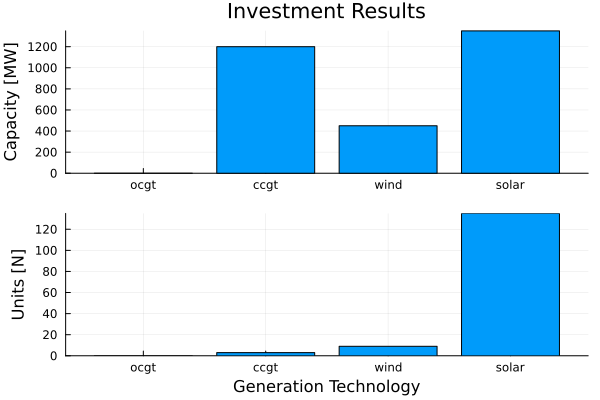

In [14]:
#plotly()
plot_two_stage_investment(model, sets, params)

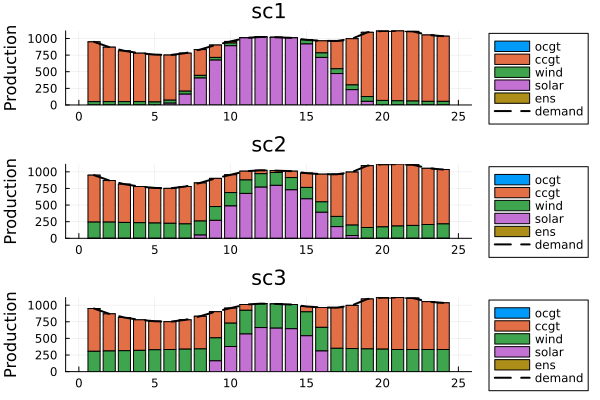

In [15]:
plot_two_stage_production(model, params)

In [11]:
save_two_stage_results_to_csv(output_folder, model)